In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
stock_data = pd.read_csv('TSLA.csv')
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [5]:
#Compute the 50 day simple moving average(SMA50) and the 200 day simple moving average(SMA200)
stock_data['SMA50'] = stock_data['Close'].rolling(50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(200).mean()
stock_data


,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,NaN,NaN
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,NaN,NaN
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,NaN,NaN
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,NaN,NaN
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,903.872197,851.032347
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,901.001398,852.642897
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,900.341798,854.587147
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,899.161598,856.564747


In [10]:
# Initialize the 'Signal' column with zeros
stock_data['Signal'] = 0

# Set 'Signal' to -1 where SMA50 crosses below SMA200
stock_data.loc[(stock_data['SMA50'] <= stock_data['SMA200']) & (stock_data['SMA50'].shift(1) > stock_data['SMA200'].shift(1)), 'Signal'] = -1

stock_data.loc[(stock_data['SMA50'] >= stock_data['SMA200']) & (stock_data['SMA50'].shift(1) < stock_data['SMA200'].shift(1)), 'Signal'] = 1

In [11]:
stock_data.dropna(inplace=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,Signal
199,2011-04-12,5.016000,5.042000,4.860000,4.930000,4.930000,6787000,4.791880,4.745270,0
200,2011-04-13,5.026000,5.138000,4.962000,4.986000,4.986000,6057500,4.795960,4.746310,0
201,2011-04-14,4.974000,5.056000,4.840000,5.028000,5.028000,4917000,4.800760,4.747620,0
202,2011-04-15,5.130000,5.236000,5.082000,5.116000,5.116000,4717500,4.808560,4.751240,0
203,2011-04-18,5.026000,5.124000,4.872000,5.006000,5.006000,5169500,4.814840,4.757070,0
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,903.872197,851.032347,0
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,901.001398,852.642897,0
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,900.341798,854.587147,0
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,899.161598,856.564747,0


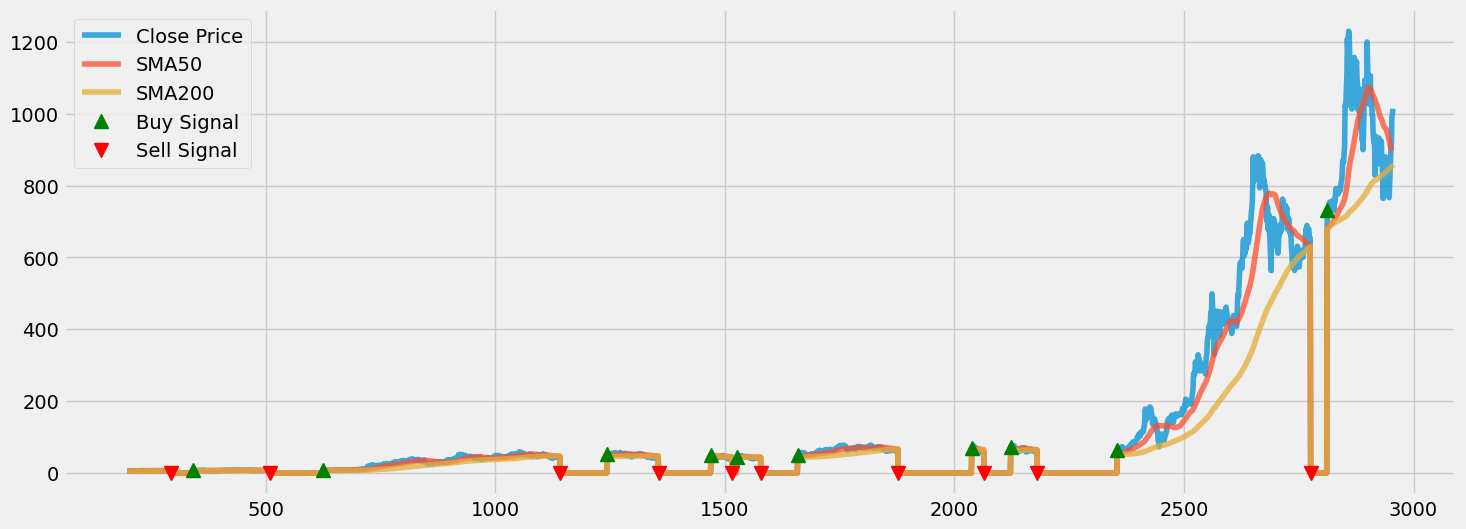

In [19]:
import matplotlib.pyplot as plt

stock_data['Signal'] = 0

stock_data.loc[(stock_data['SMA50'] <= stock_data['SMA200']) & (stock_data['SMA50'].shift(1) > stock_data['SMA200'].shift(1)), 'Signal'] = -1

stock_data.loc[(stock_data['SMA50'] > stock_data['SMA200']) & (stock_data['SMA50'].shift(1) <= stock_data['SMA200'].shift(1)), 'Signal'] = 1

plt.figure(figsize=(16,6))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.75)
plt.plot(stock_data['SMA50'], label='SMA50', alpha=0.75)
plt.plot(stock_data['SMA200'], label='SMA200', alpha=0.75)

plt.plot(stock_data[stock_data['Signal'] == 1].index,
         stock_data['Close'][stock_data['Signal'] == 1],
         '^', markersize=10, color='green', label='Buy Signal')

plt.plot(stock_data[stock_data['Signal'] == -1].index,
         stock_data['Close'][stock_data['Signal'] == -1],
         'v', markersize=10, color='red', label='Sell Signal')

plt.legend()
plt.show()
